In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset import XinguDataset

In [2]:
# getting Fold 1 dataset info
train_regions = [1, 2, 6, 7, 8, 9, 10]
test_regions = [3, 4]
train_ds = XinguDataset('./scenes_allbands_ndvi',
                                './truth_masks',
                                range(1,4),
                                train_regions,
                                256,
                                64,
                                reflect_pad=False,
                                transforms=True)
test_ds = XinguDataset('./scenes_allbands_ndvi',
                               './truth_masks',
                               range(1,4),
                               test_regions,
                               256,
                               256,
                               reflect_pad=True,
                               transforms=False)

In [3]:
print(f'Train ds: {len(train_ds)}')
print(f'Test ds: {len(test_ds)}')

Train ds: 9432
Test ds: 28


In [4]:
print(len(train_ds.msk_patches))

9432


In [6]:
for idx, i in enumerate(test_ds):
    if i[0].shape[1:] != (256,256):
        print(f'{idx}[0]: {i[0].shape}')
    if i[1].shape[1:] != (256,256):
        print(f'{idx}[1]\n: {i[1].shape}')
    

In [4]:
ds_no_aug = XinguDataset('scenes_allbands', 'truth_masks', [4,6,7], range(1, 11), 256, 256)
ds_aug = XinguDataset('scenes_allbands', 'truth_masks', [8], range(1, 11), 256, 256, True)

In [5]:
print(f'ds_no_aug: {len(ds_no_aug)} samples')
print(f'ds_aug: {len(ds_aug)} samples')

ds_no_aug: 124 samples
ds_aug: 992 samples


In [6]:
image, mask = ds_no_aug.__getitem__(11)
print(f'mask shape: {mask.shape}')

mask shape: (1, 256, 256)


In [7]:
# ch = image.shape[0]
# for channel in range(ch):
#     # normalize each band
#     image[channel] = (image[channel] - image[channel].min()) / (image[channel].max() - image[channel].min())

In [8]:
np.unique(image)

array([0.00784314, 0.01176471, 0.01568628, 0.01960784, 0.02352941,
       0.02745098, 0.03137255, 0.03529412, 0.03921569, 0.04313726,
       0.04705882, 0.05098039, 0.05490196, 0.05882353, 0.0627451 ,
       0.06666667, 0.07058824, 0.07450981, 0.07843138, 0.08235294,
       0.08627451, 0.09019608, 0.09411765, 0.09803922, 0.10196079,
       0.10588235, 0.10980392, 0.11372549, 0.11764706, 0.12156863,
       0.1254902 , 0.12941177, 0.13333334, 0.13725491, 0.14117648,
       0.14509805, 0.14901961, 0.15294118, 0.15686275, 0.16078432,
       0.16470589, 0.16862746, 0.17254902, 0.1764706 , 0.18039216,
       0.18431373, 0.1882353 , 0.19215687, 0.19607843, 0.2       ,
       0.20392157, 0.20784314, 0.21176471, 0.21568628, 0.21960784,
       0.22352941, 0.22745098, 0.23137255, 0.23529412, 0.23921569,
       0.24313726, 0.24705882, 0.2509804 , 0.25490198, 0.25882354,
       0.2627451 , 0.26666668, 0.27058825, 0.27450982, 0.2784314 ,
       0.28235295, 0.28627452, 0.2901961 , 0.29411766, 0.29803

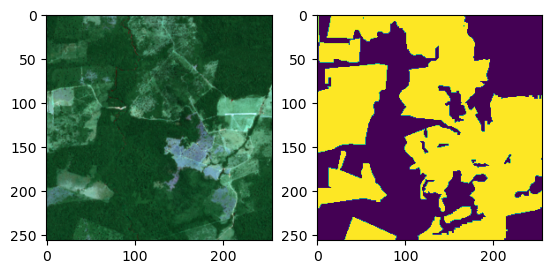

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())

In [10]:
image, mask = ds_no_aug.__getitem__(8)
print(f'mask shape: {mask.shape}')

mask shape: (1, 256, 256)


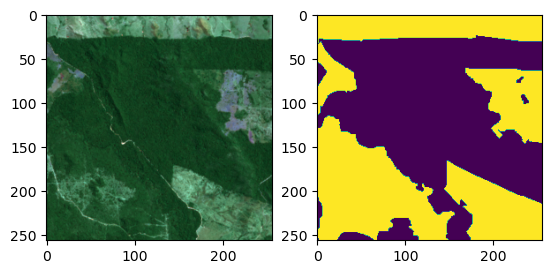

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())

In [12]:
from dataset_pca import XinguDataset
dataset_pca = XinguDataset('scenes_pca', 'truth_masks', range(1, 4), range(1, 11), 256, 256, True)

In [20]:
image, mask = dataset_pca.__getitem__(89)
print(f'mask shape: {mask.shape}')

mask shape: (1, 256, 256)


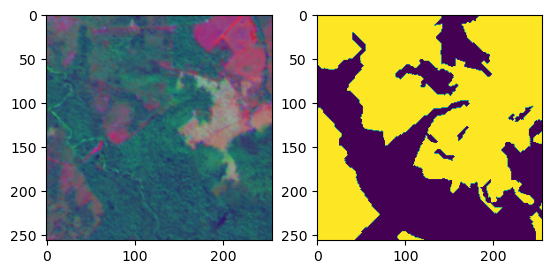

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())